# Hacks для парсинга

А вот и первая проблема! Обращаемся к [главному источнику знаний](https://en.wikipedia.org/wiki/HTTP_403) и выясняем, что 403-я ошибка выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать. 

Попробуем выяснить, почему. Для этого проверим, как выглядел финальный запрос, отправленный нами на сервер.

In [ ]:
for key, value in response.request.headers.items():
    print(key+": "+value)

Похоже, мы недвусмысленно дали понять серверу, что мы используем python, а именно библиотеку requests версии 2.14.2. Скорее всего, это вызвало у сервера некоторые подозрения относительно наших благих намерений и он решил нас безжалостно отвергнуть. Для сравнения, можно посмотреть, как выглядят request-headers у запроса через браузер:

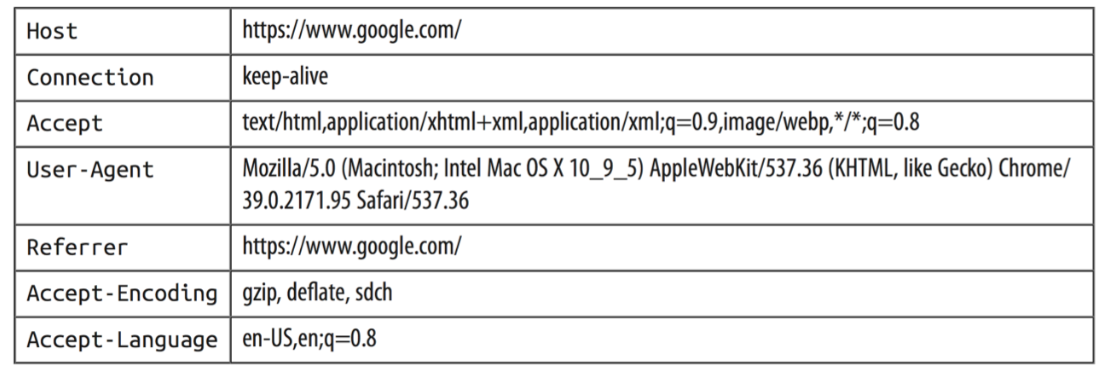

Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными.

Библиотек, которые справляются с такой задачей, существует очень много, мы воспользуемся [`fake-useragent`](https://pypi.python.org/pypi/fake-useragent). При вызове метода из различных кусочков будет генерироваться случайное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос:

In [ ]:
pip install fake_useragent

In [2]:
from fake_useragent import UserAgent

In [3]:
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'

In [ ]:
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

In [ ]:
meme_page = 'http://knowyourmeme.com/memes/doge'

response = requests.get(meme_page, headers={'User-Agent': UserAgent().chrome})

html = response.content
soup = BeautifulSoup(html,'html.parser')

# 5. Что делать, если сервер разозлился? 


* Вы решили собрать себе немного данных 
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами 
* Error 403, 404, 504, $\ldots$ 
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

<center>
<img src="pictures/doge.jpg" width="450"> 

### а) быть терпеливым 

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки 
* Сервер любит временные задержки, так как боится сломаться от перегрузок

In [ ]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

### б) общаться через посредников

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/proxy.jpeg" width="400"> 

In [ ]:
my_proxies = {
    'http': '182.53.206.47:47592',
    'https': '182.53.206.47:47592'
}

r = requests.get('https://httpbin.org/ip', proxies=my_proxies)

print(r.json())

Запрос работал немного подольше, ip адрес сменился. Большая часть прокси-серверов, которые вы найдёте работают плохо. Иногда запрос идёт очень долго и выгоднее сбросить его. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код перестанет работать. 

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

## в) уходить глубже 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tor.jpg" width="600"> 

Можно попытаться обходить злые сервера через тор. Есть несколько способов, но мы про это говорить не будем. Лучше подробно почитать [в статье на Хабре.](https://habr.com/ru/company/ods/blog/346632/)

## Совместить всё? 

1. Начните с простых приемов, например с `time.sleep`
2. Пробуйте новые приёмы постепенно
3. Каждый новый приём замедляет скорость работы
4. [Разные продвинутые способы работы с библиотекой requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/)

> Напоследок, хотелось бы сказать пару слов о парсинге вообще и при помощи Тора в частности. Собирать себе данные самостоятельно - это стильно, модно и в принципе интересно, можно получить наборы, которых еще никто никогда не обрабатывал, сделать что-то новое, посмотреть, наконец, на все мемы мира сразу. Однако не стоит забывать, что ограничения, введенные сервером, в том числе баны, появились не просто так, а в целях защиты сайта от DDoS-атак. К чужому труду стоит относится с уважением, и даже если у сервера никакой защиты нет, - это еще не повод неограниченно забрасывать его своими запросами, особенно если это может привести к его отключению - [уголовное наказание](http://sd-company.su/article/security/ddosataka-ugolovnaya-otvetstvennost) никто не отменял. Успешных и безопасных вам исследований!

# Материалы

* [Парсим мемы в python](https://habr.com/ru/company/ods/blog/346632/) - подробная статья на Хабре
* [Продвинутое использование requests](https://2.python-requests.org/en/master/user/advanced/)
* [Репозиторий](https://github.com/DmitrySerg/memology) с исследованием мемов